In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from numpy import linalg as LA
from sklearn import datasets
from sklearn.metrics.pairwise import pairwise_distances
import scipy as sp
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy import stats
import scipy.cluster.hierarchy as sc
import seaborn as sns
import sys
from sklearn.metrics import silhouette_score
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
wine_data = pd.read_csv('Wine.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
wine_data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
wine_data.isnull()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
wine_data = wine_data.dropna()

In [9]:
wine_data = wine_data.drop_duplicates()

In [10]:
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [11]:
wine_data.values

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 3.920e+00, 1.065e+03,
        1.000e+00],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 3.400e+00, 1.050e+03,
        1.000e+00],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 3.170e+00, 1.185e+03,
        1.000e+00],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 1.560e+00, 8.350e+02,
        3.000e+00],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 1.620e+00, 8.400e+02,
        3.000e+00],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 1.600e+00, 5.600e+02,
        3.000e+00]])

In [12]:
wine_data['Customer_Segment'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [13]:
wine_X = wine_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [14]:
wine_Y = wine_data['Customer_Segment']
wine_Y_arr = np.array(wine_Y)

In [15]:
wine_X.shape

(178, 13)

In [16]:
wine_Y.shape

(178,)

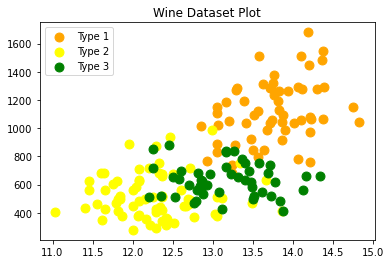

In [17]:
plt.scatter(wine_X[wine_Y == 1, 0], wine_X[wine_Y == 1, 12], s = 80, c = 'orange', label = 'Type 1')
plt.scatter(wine_X[wine_Y == 2, 0], wine_X[wine_Y == 2, 12], s = 80, c = 'yellow', label = 'Type 2')
plt.scatter(wine_X[wine_Y == 3, 0], wine_X[wine_Y == 3, 12], s = 80, c = 'green', label = 'Type 3')

plt.title("Wine Dataset Plot")
plt.legend()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

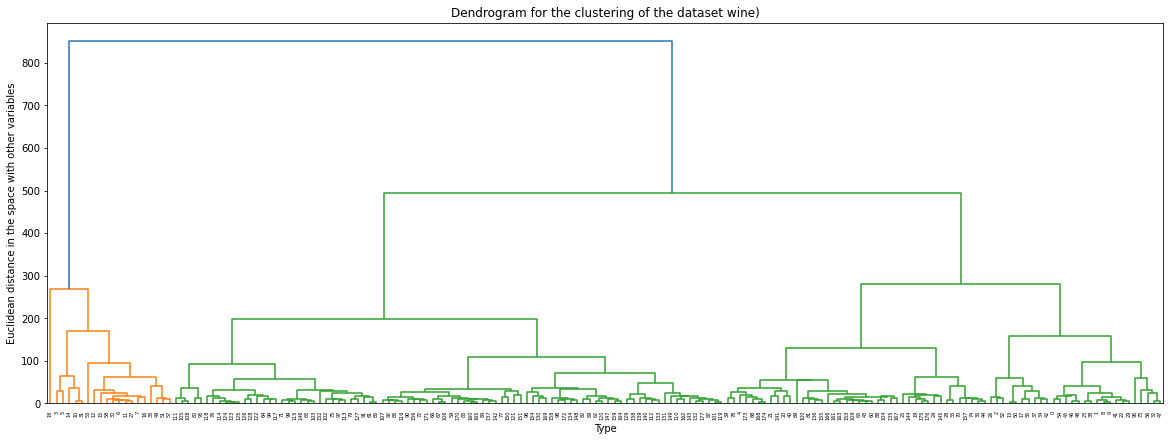

In [18]:
Z = sch.linkage(wine_X, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [19]:
cluster_H = AgglomerativeClustering(n_clusters=3)
# Modelling the data
model_clt = cluster_H.fit(wine_X)
model_clt
pred1 = model_clt.labels_
pred1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

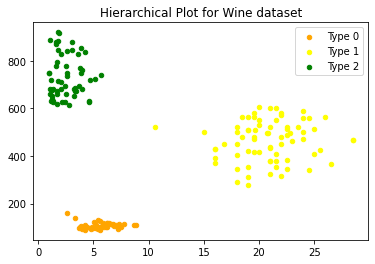

In [20]:
plt.scatter(wine_X[pred1 == 0, 9], wine_X[pred1 == 0, 4], s = 20, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred1 == 1, 3], wine_X[pred1 == 1, 12], s = 20, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred1 == 2, 1], wine_X[pred1 == 2, 12], s = 20, c = 'green', label = 'Type 2')
plt.title('Hierarchical Plot for Wine dataset')
plt.legend()

In [21]:
import sklearn.metrics as sm

target = pd.DataFrame(wine_data['Customer_Segment'])
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
#fit the model on the dataset
HClustering.fit(wine_X)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)

0.10112359550561797

In [22]:
def hierarchical_clustering(data,linkage,no_of_clusters):  
    color = ['r','g','b','y','c','m','k','w']
    initial_distances = pairwise_distances(data,metric='euclidean') 
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage) 
    
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p=0
    
    print(clusters_to_plot)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
        
    plt.show()

In [23]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()


    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
        
    
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
      
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp

        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
        elif(linkage=="Centroid" or linkage =="centroid"):
            for i in range(0,input.shape[0]):
                if(i!=col_index and i!=row_index):
                    dist_centroid = cal_dist_from_centroid(i,row_index,col_index)
                    input[col_index][i] = dist_centroid
                    input[i][col_index] = dist_centroid
                   
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters

[0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 18, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


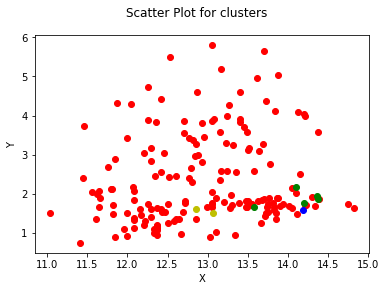

In [24]:
hierarchical_clustering(wine_data.values,"single",3)

[0, 0, 0, 3, 4, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 4, 4, 0, 23, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 23, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4]


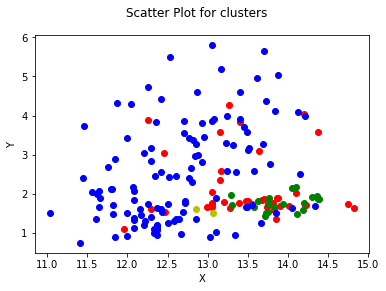

In [25]:
  hierarchical_clustering(wine_data.values,"average",3)

[0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 18, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


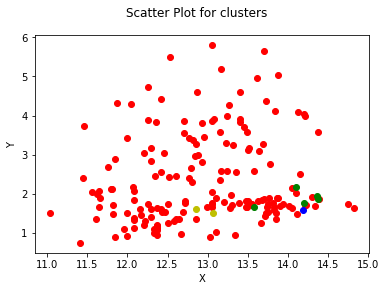

In [26]:
hierarchical_clustering(wine_data.values,"complete",3)

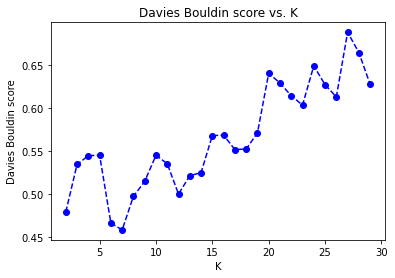

In [27]:
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(data)
    score = davies_bouldin_score(data, model)    
    return score
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(wine_data, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

### Therefore it can be seen that 7 clusters is the optimal number

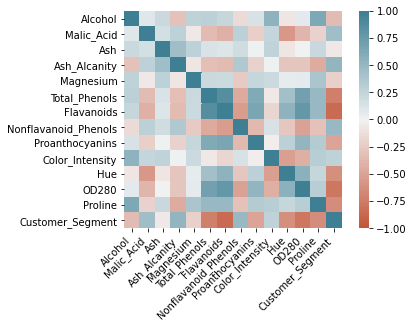

In [28]:
corr = wine_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [29]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(wine_X)
    wcss.append(kmeans.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

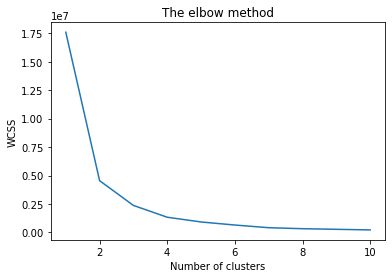

In [30]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [31]:
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(wine_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([1, 1, 1, 3, 4, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 4, 4, 4,
       1, 1, 4, 4, 1, 3, 4, 1, 3, 3, 1, 3, 1, 4, 4, 1, 1, 4, 4, 1, 1, 0,
       4, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 4, 0, 4, 2, 2, 1, 4, 2, 2, 2, 4, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 4, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 2, 0, 4, 4, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 4, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 2, 0, 4, 4, 4,
       4, 0])

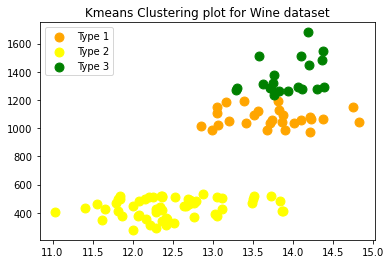

In [32]:
plt.scatter(wine_X[pred_kmeans == 1, 0], wine_X[pred_kmeans == 1, 12], s = 80, c = 'orange', label = 'Type 1')
plt.scatter(wine_X[pred_kmeans == 2, 0], wine_X[pred_kmeans == 2, 12], s = 80, c = 'yellow', label = 'Type 2')
plt.scatter(wine_X[pred_kmeans == 3, 0], wine_X[pred_kmeans == 3, 12], s = 80, c = 'green', label = 'Type 3')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

In [33]:
Xtrain, Xtest, y_train, y_test = train_test_split(wine_X, wine_Y)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Confusion matrix',  confusion_matrix(y_test, y_pred))
print('Classification', classification_report(y_test, y_pred))

Accuracy Score 0.9555555555555556
Confusion matrix [[17  0  0]
 [ 2 13  0]
 [ 0  0 13]]
Classification               precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           2       1.00      0.87      0.93        15
           3       1.00      1.00      1.00        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [34]:
km = KMeans(n_clusters=3, random_state=42)

In [35]:
km.fit_predict(wine_X)

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [36]:
score = silhouette_score(wine_X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.571


In [37]:
  
# K-Means
kmeans = KMeans(n_clusters=3, random_state=1).fit(wine_X)
  
# we store the cluster labels
labels = kmeans.labels_
  
print(metrics.calinski_harabasz_score(wine_X, labels))

561.815657860671


In [38]:
metrics.davies_bouldin_score(wine_X, labels)

0.5342431775436286

In [39]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = sc.linkage(wine_data, method='single')
c ,coph_dists = cophenet(Z,pdist(wine_data))
c

0.7764986482391519

In [40]:
Z = sc.linkage(wine_data, method='centroid')
c ,coph_dists = cophenet(Z,pdist(wine_data))
c

0.8023416618863254

In [41]:
Z = sc.linkage(wine_data, method='complete')
c ,coph_dists = cophenet(Z,pdist(wine_data))
c

0.7951028595619122

In [42]:
Z = sc.linkage(wine_data, method='average')
c ,coph_dists = cophenet(Z,pdist(wine_data))
c

0.8022631451763147

### Thus it can be concluded that Centroid method is best since it has the highest score compared to other linkage methods